# Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

# Loading the file Disease.xlsx

In [2]:
df = pd.read_excel('C:\\Users\\intel\\Downloads\\Disease.xlsx')
df2 = pd.read_excel('C:\\Users\\intel\\Downloads\\Test Data Disease.xlsx')

# Defining the headings of the dataframes as x and y variables

In [3]:
x = df[['running nose','nasal obstruction','sneezing','throat pain','tiredness','cough','fever','malaise','inflamed tonsils','hoarse voice','breathlessness','chest pain','restlessness','anxiety','wheezing','chills','body ache','appetit loss','lethargy','weight loss','headache','memory loss','sleeplessness','vomiting','nausea','constipation','rashes','itching','joint pain','swelling','weakness','hyper sweating','swollen gums','weight gain','ear pain','body stiffness','temperature']]
y = df['Doctor Needed']
x2 = df2[['running nose','nasal obstruction','sneezing','throat pain','tiredness','cough','fever','malaise','inflamed tonsils','hoarse voice','breathlessness','chest pain','restlessness','anxiety','wheezing','chills','body ache','appetit loss','lethargy','weight loss','headache','memory loss','sleeplessness','vomiting','nausea','constipation','rashes','itching','joint pain','swelling','weakness','hyper sweating','swollen gums','weight gain','ear pain','body stiffness','temperature']]
y2 = df2['Doctor Needed']

# Splitting the data into test and train data 

In [4]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=10)

# Checking accuracy of the KNN model : Method 1 

In [5]:
accuracy = []
num_neigh = []
for ii in range(1,16):
    KNN = KNeighborsClassifier(n_neighbors=ii)
    KNN.fit(x_train,y_train)
    accuracy.append(KNN.score(x_test,y_test))
    num_neigh.append(ii)
print(accuracy)

[0.9230769230769231, 0.9230769230769231, 0.8846153846153846, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.8461538461538461, 0.8846153846153846, 0.8461538461538461, 0.8461538461538461, 0.8076923076923077, 0.8076923076923077, 0.8461538461538461, 0.8461538461538461]


# Checking accuracy of the KNN model : Method 2

In [6]:
for K in range(20):
 K_value = K+1
 neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
 neigh.fit(x_train,y_train) 
 y_pred = neigh.predict(x_test)
 print("Accuracy is", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is 92.3076923076923 % for K-Value: 1
Accuracy is 92.3076923076923 % for K-Value: 2
Accuracy is 88.46153846153845 % for K-Value: 3
Accuracy is 84.61538461538461 % for K-Value: 4
Accuracy is 84.61538461538461 % for K-Value: 5
Accuracy is 84.61538461538461 % for K-Value: 6
Accuracy is 84.61538461538461 % for K-Value: 7
Accuracy is 84.61538461538461 % for K-Value: 8
Accuracy is 88.46153846153845 % for K-Value: 9
Accuracy is 84.61538461538461 % for K-Value: 10
Accuracy is 84.61538461538461 % for K-Value: 11
Accuracy is 80.76923076923077 % for K-Value: 12
Accuracy is 80.76923076923077 % for K-Value: 13
Accuracy is 84.61538461538461 % for K-Value: 14
Accuracy is 84.61538461538461 % for K-Value: 15
Accuracy is 80.76923076923077 % for K-Value: 16
Accuracy is 84.61538461538461 % for K-Value: 17
Accuracy is 84.61538461538461 % for K-Value: 18
Accuracy is 84.61538461538461 % for K-Value: 19
Accuracy is 76.92307692307693 % for K-Value: 20


# KNN : Plotting the accuracy graph - Model 1.1

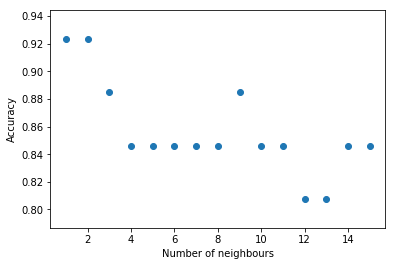

In [7]:
plt.scatter(num_neigh,accuracy)
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show();

# Model 1.1 : Using the KNN model to predict the doctor needed 

In [10]:
KNN = KNeighborsClassifier(2)
KNN = KNN.fit(x,y)
test = pd.DataFrame()
test['running nose'] = [0]
test['nasal obstruction'] = [0]
test['sneezing'] = [0]
test['throat pain'] = [0]
test['tiredness'] = [0]
test['cough'] = [1]
test['fever'] = [0]
test['malaise'] = [1]
test['inflamed tonsils'] = [0]
test['hoarse voice'] = [0]
test['breathlessness'] = [1]
test['chest pain'] = [1]
test['restlessness'] = [0]
test['anxiety'] = [0]
test['wheezing'] = [0]
test['chills'] = [1]
test['body ache'] = [1]
test['appetit loss'] = [1]
test['lethargy'] = [0]
test['weight loss'] = [0]
test['headache'] = [0]
test['memory loss'] = [0]
test['sleeplessness'] = [0]
test['vomiting'] = [0]
test['nausea'] = [0]
test['constipation'] = [0]
test['rashes'] = [0]
test['itching'] = [0]
test['joint pain'] = [0]
test['swelling'] = [0]
test['weakness'] = [1]
test['hyper sweating'] = [0]
test['swollen gums'] = [0]
test['weight gain'] = [0]
test['ear pain'] = [0]
test['body stiffness'] = [0]
test['temperature'] = [6]
predict_disease = KNN.predict(test)
print(predict_disease)

['Pulmonologist']


# KNN : Making the confusion matrix - Model 1.1

In [11]:
print(confusion_matrix(y_test, y_pred)) 

[[6 0 0 0 0]
 [0 5 0 0 1]
 [0 2 4 0 0]
 [0 0 2 1 0]
 [0 0 0 1 4]]


# KNN : Making the heatmap from the confusion matrix - Model 1.1

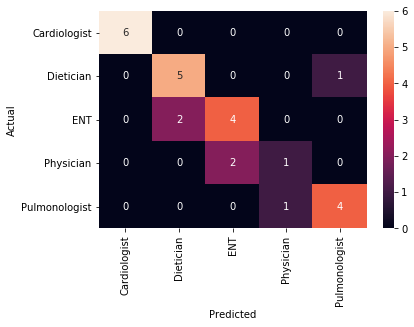

In [12]:
df = pd.DataFrame()
df['Actual'] = y_test
df['Predicted'] = y_pred
freq = pd.crosstab(df.Actual,df.Predicted)
sns.heatmap(freq,annot=True,fmt="d")

# Model 1.2 : Testing model through uploaded file

In [13]:
predict_disease = KNN.predict(x2)
print(predict_disease)

['Pulmonologist' 'Pulmonologist' 'ENT' 'Physician' 'ENT' 'ENT' 'Dietician'
 'Dietician' 'Cardiologist' 'Cardiologist']


# KNN : Making the confusion matrix - Model 1.2

In [14]:
print(confusion_matrix(y2, predict_disease)) 

[[2 0 0 0 0]
 [0 2 0 0 0]
 [0 0 2 0 0]
 [0 0 1 1 0]
 [0 0 0 0 2]]


# KNN : Making the heatmap from the confusion matrix - Model 1.2

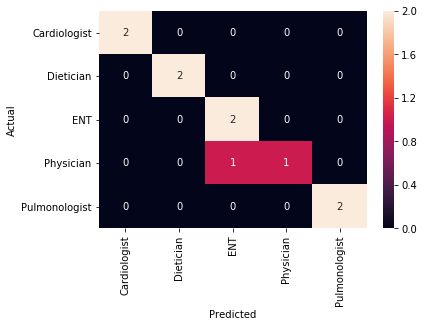

In [15]:
df = pd.DataFrame()
df['Actual'] = y2
df['Predicted'] = predict_disease
freq = pd.crosstab(df.Actual,df.Predicted)
sns.heatmap(freq,annot=True,fmt="d")

# Finding Min_samples_split of the Decision Tree model 

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616, 0.9615384615384616]


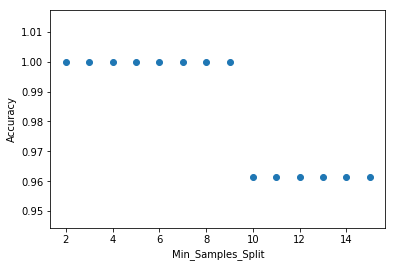

In [16]:
accuracy = []
min_samples = []
for ii in range(2,16):
    dt = tree.DecisionTreeClassifier(min_samples_split=ii)
    dt.fit(x_train,y_train)
    accuracy.append(dt.score(x_test,y_test))
    min_samples.append(ii)

print(accuracy)

plt.scatter(min_samples,accuracy)
plt.xlabel('Min_Samples_Split')
plt.ylabel('Accuracy')
plt.show();

# Finding Max_depth of the Decision Tree model

[0.5, 0.7307692307692307, 0.9615384615384616, 0.9615384615384616, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


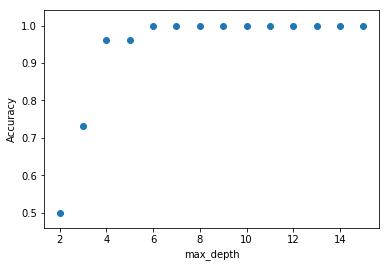

In [17]:
accuracy = []
max_depth = []
for ii in range(2,16):
    dt = tree.DecisionTreeClassifier(max_depth=ii)
    dt.fit(x_train,y_train)
    accuracy.append(dt.score(x_test,y_test))
    max_depth.append(ii)
print(accuracy)
plt.scatter(max_depth,accuracy)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

plt.show();

# Model 2.1 : Using the Decision Tree model to predict the doctor needed

In [18]:
dt = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 10)
dt.fit(x_train,y_train)
predict_disease = dt.predict(x_test)
print(predict_disease)

['Dietician' 'Dietician' 'Cardiologist' 'Physician' 'Physician'
 'Pulmonologist' 'Pulmonologist' 'Dietician' 'Cardiologist' 'ENT' 'ENT'
 'Pulmonologist' 'Pulmonologist' 'ENT' 'Dietician' 'ENT' 'Physician'
 'Cardiologist' 'Dietician' 'Cardiologist' 'Cardiologist' 'Cardiologist'
 'Dietician' 'ENT' 'ENT' 'ENT']


# DT : Making the Confusion Matrix - Model 2.1

In [19]:
print(confusion_matrix(y_test, predict_disease)) 

[[6 0 0 0 0]
 [0 6 0 0 0]
 [0 0 6 0 0]
 [0 0 0 3 0]
 [0 0 1 0 4]]


# DT : Making the heatmap from the confusion matrix - Model 2.1

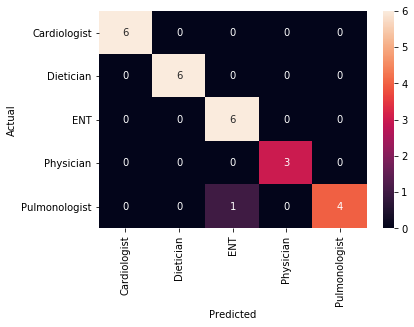

In [20]:
df = pd.DataFrame()
df['Actual'] = y_test
df['Predicted'] = predict_disease
freq = pd.crosstab(df.Actual,df.Predicted)
sns.heatmap(freq,annot=True,fmt="d")

# Model 2.2 : Testing model through uploaded file

In [21]:
predict_disease = dt.predict(x2)
print(predict_disease)

['Pulmonologist' 'ENT' 'Physician' 'Physician' 'ENT' 'ENT' 'Dietician'
 'Dietician' 'Cardiologist' 'Cardiologist']


# DT : Making the Confusion Matrix - Model 2.2

In [22]:
print(confusion_matrix(y2, predict_disease)) 

[[2 0 0 0 0]
 [0 2 0 0 0]
 [0 0 2 0 0]
 [0 0 0 2 0]
 [0 0 1 0 1]]


# DT : Making the heatmap from the confusion matrix - Model 2.2

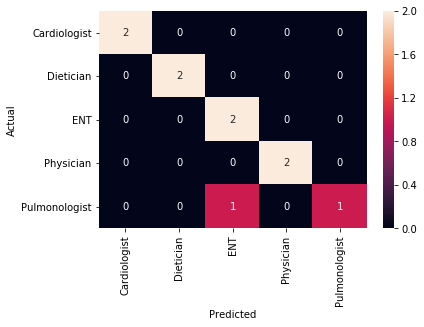

In [23]:
df = pd.DataFrame()
df['Actual'] = y2
df['Predicted'] = predict_disease
freq = pd.crosstab(df.Actual,df.Predicted)
sns.heatmap(freq,annot=True,fmt="d")